In [1]:
!pip install rasterio numpy scipy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 50.5 MB/s eta 0:00:00


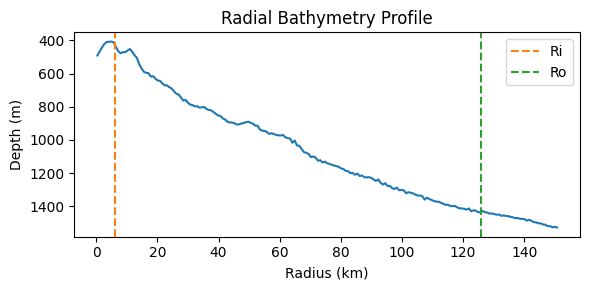

In [3]:
import rasterio, numpy as np, matplotlib.pyplot as plt

center_lon, center_lat = 70.2333, 18.6667
Ri_km = 6.296
Ro_km = 251.844/2

with rasterio.open("bathymetry.tif") as src:
    bathy = -src.read(1).astype(float)
    bathy[bathy == src.nodata] = np.nan
    transform = src.transform
    h,w = src.height, src.width

cols, rows = np.meshgrid(np.arange(w), np.arange(h))
lons, lats = rasterio.transform.xy(transform, rows, cols)
lons = np.array(lons); lats = np.array(lats)

dx = (lons - center_lon) * 111.0 * np.cos(np.deg2rad(center_lat))
dy = (lats - center_lat) * 111.0
r2d = np.sqrt(dx*dx + dy*dy)

r = r2d.ravel()
b = bathy.ravel()
rbins = np.linspace(0, Ro_km*1.2, 200)
rcent = 0.5*(rbins[:-1] + rbins[1:])
bathy_prof = [np.nanmean(b[(r>=rbins[i]) & (r<rbins[i+1])])
              for i in range(len(rbins)-1)]

plt.figure(figsize=(6,3))
plt.plot(rcent, bathy_prof, color='tab:blue')
plt.axvline(Ri_km, linestyle='--', color='C1', label="Ri")
plt.axvline(Ro_km, linestyle='--', color='C2', label="Ro")
plt.xlabel("Radius (km)")
plt.ylabel("Depth (m)")
plt.title("Radial Bathymetry Profile")
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()
